# Recherche de racine d'une fonction numérique

In [16]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Des fonctions pour tester

On considère la fonction définie sur $\mathbb{R}$ par 
$$
f_1(x) = \cos(x)-x+\dfrac{1}{10}.
$$

Commençons par écrire une fonction **f1(x)** qui retournera un scalaire **y** qui correspond à $f_1(x)$.

In [19]:
def f1(x):
    y = cos(x)- x + 1/10
    return y

print(f1(0))

1.1


Procéder comme ci-dessus pour les fonctions suivantes :
+ $f_2(x) = x^3+x-1000$,
+ $f_3(x) = x-e^{-x}$.

In [20]:
def f2(x):
    y2 = x**3 + x - 1000
    return y2

def f3(x):
    y3 = x - e**-x
    return y3

print(f2(0))
print(f3(0))

-1000
-1.0


## Localisation par la méthode de dichotomie

Ecrire une fonction **dicho(f,a,b,epsx)** qui applique l'algorithme de la dichotomie pour chercher la racine de **f** qui existe entre **a** et **b** tant que 
$$
\quad \dfrac{b_{n}-a_n}{2}> epsx,
$$
où $c_n$ est le milieu de l'intervalle $[a_n,b_n]$ considéré à l'étape $n$.

Cette fonction doit retourner le dernier milieu calculé, ainsi que le nombre d'itérations effectuées.

In [21]:
def dicho(f,a,b,epsx):
    m = (a+b)/2
    while fabs(f(m)) > epsx :
        if f(a)*f(m) < 0 :
            b = m
        else :
            a = m
        m = (a+b)/2
    return m

Obtenir une approximation grossière de la racine $r_i$ de chacune des fonctions $f_i$ définies ci-dessus, en appliquant la méthode de dichotomie avec **epsx = 0.01**, en utilisant les intervalles initiaux suivants : 
+ pour $f_1$, $[a,b] = \left[0,\dfrac{3 \pi}{8}\right]$ ; 
+ pour $f_2$, $[a,b] = [9,10]$ ; 
+ pour $f_3$, $[a,b] = [0,1]$.

In [5]:
from math import *

a = 3*pi/8
print(dicho(f1, 0, a, 0.01))
print(dicho(f2, 9, 10, 0.01))
print(dicho(f3, 0, 1, 0.01))

0.8007379712763046
9.9666748046875
0.5625


## Approche rapide et précise de la racine par la méthode de Newton

Ecrire une fonction **Newton(f,df,x0,epsx,epsf)** qui cherche à approcher précisément la racine de **f**, en appliquant l'algorithme de Newton depuis **x0** tant que 
$$
|f(x_n)| > epsf \quad\mbox{et}\quad |x_{n+1}-x_n|> epsx.
$$

La fonction **df** permet d'évaluer la dérivée de la fonction **f**.

Cette fonction doit retourner le dernier itéré calculé, ainsi que le nombre d'itérations effectuées.

In [6]:
def Newton(f,df,x0,epsx,epsf):
    x1 = x0 - ((f(x0))/(df(x0)))
    i = 0
    while fabs(f(x0)) > epsf and fabs(x1 - x0) > epsx :
        x0 = x1
        x1 = x0 - ((f(x0))/(df(x0))) 
        i += 1
    return x1,i

Obtenir une approximation précise de la racine $r_i$ de chacune des fonctions $f_i$ définies ci-dessus, en appliquant la méthode de Newton avec **epsx = epsf =**$10^{-10}$, en utilisant pour **x0** les solutions grossières obtenues par la méthode de dichotomie.

Pour pouvoir appeler la fonction **Newton**, il faudra penser à écrire des fonctions **df1**, **df2**, et **df3** qui permettent d'évaluer les dérivées des fonctions $f_1$, $f_2$ et $f_3$ en un point $x$.

In [7]:
from math import *

def df1(x):
    y = -sin(x) - 1
    return y

def df2(x):
    y2 = 3*x**2 + 1
    return y2

def df3(x):
    y3 = 1 + e**-x
    return y3

epsx = 10**-10
epsf = 10**-10

print(Newton(f1, df1, 0.8007379712763046, epsx, epsf))
print(Newton(f2, df2, 9.9666748046875, epsx, epsf))
print(Newton(f3, df3, 0.5625, epsx, epsf))

(0.798081601397311, 2)
(9.966666790534973, 1)
(0.5671432904097838, 2)


## Une application : le service de R. Federer

R. Federer est au service depuis la position O de coordonnées $(0,0,0)$. Il lance la balle verticalement et la frappe avec sa raquette en un point D situé sur la verticale de O à la hauteur $H$.
La balle part alors de D avec une vitesse de module $v_0$ et un angle $\alpha$ par rapport à l'horizontale.
On se place alors dans un repère orthonormé tel que les coordonnées de $\vec{v}$ sont
$(v_0 \cos(\alpha),v_0 \sin(\alpha),0)$.
Supposons que la balle est de masse $m$ et considérons-la comme un point. 
On étudie le mouvement de la balle dans le repère indiqué ci-dessus, en négligeant l'action de l'air.

La balle est soumise uniquement à son poids $\vec{P}$. 
En effet, on ne tient compte ni de la poussée d’Archimède, ni de la force de
frottement de l’air sur la balle. 
De plus, la raquette n’agit plus pendant le mouvement de la balle.

En appliquant la seconde loi de Newton à la balle on a simplement $m \vec{a} = m \vec{g}$, c'est à dire $\vec{a} = \vec{g}$, ou encore, en projetant sur chacun des axes : 
$$
\begin{array}{rcl}
\dfrac{dv_x}{dt} & = & 0,
\\
\dfrac{dv_y}{dt} & = & -g,
\\
v_z & = & 0.
\end{array}
$$

En intégrant une première fois et en utilisant les conditions initiales de vitesse, on obtient
$$
\begin{array}{rcl}
v_x & = & v_0 \cos(\alpha),
\\
v_y & = & -gt+v_0 \sin(\alpha),
\\
v_z & = & 0.
\end{array}
$$

Si on intègre une seconde fois et si on utilise les conditions initiales de position, on aboutit à
$$
\begin{array}{rcl}
x & = & t v_0 \cos(\alpha),
\\
y & = & -g\dfrac{t^2}{2}+tv_0 \sin(\alpha) + H,
\\
z & = & 0.
\end{array}
$$

On peut déduire $t$ de la première équation : $t = \dfrac{x}{v_0 \cos(\alpha)}$.
En injectant le résultat dans la seconde équation, on obtient :
$$
y = -\dfrac{g}{2} \left(\dfrac{x}{v_0 \cos(\alpha)}\right)^2+\left(\dfrac{x}{v_0 \cos(\alpha)}\right)v_0 \sin(\alpha) + H
$$
ou encore
$$
y = -\dfrac{g}{2} \left(\dfrac{x}{v_0 \cos(\alpha)}\right)^2+x \tan(\alpha) + H.
$$

Les mesures faites sur le terrain sont les suivantes : 
+ la raquette de R. Federer a frappé la balle avec $H = 2.20m$,
+ le module de la vitesse était $v_0 = 126 km.h^{-1}$,
+ la balle a touché le sol en $x = 18.7m$.

On rappelle que $g \simeq 9.81 m.s^{-2}$.

On se demande quel angle $\alpha$ faisait le vecteur vitesse avec l'horizontale ?

### 1) Un tracé

Réaliser un tracé de la fonction 
$$\alpha \mapsto -\dfrac{g}{2} \left(\dfrac{x}{v_0 \cos(\alpha)}\right)^2+x \tan(\alpha) + H$$
pour $\alpha$ entre $-\dfrac{\pi}{4}$ et $\dfrac{\pi}{4}$ afin de décider sur quel intervalle il serait pertinent de démarrer une dichotomie.

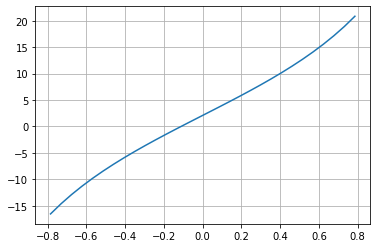

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import * 
from pylab import *

def federer(alpha):
    y = -(9.81/2)*(18.7/126*cos(alpha))**2 + 18.7*tan(alpha) + 2.20
    return y

z = np.linspace(-pi/4,pi/4,30)
plt.plot(z, federer(z))

plt.grid()

plt.show()

### 2) Localisation de la racine par dichotomie

In [9]:
print(dicho(federer,-pi/4,pi/4,0.01))

-0.11198059751565181


### 3) Approximation précise de l'angle par la méthode de Newton

In [10]:
def dfederer(alpha):
    y = -4.905 *((4712*sin(alpha)*18.7)/(126*cos(alpha)**2)*126*cos(alpha)) + 18.7/(cos(alpha)**2)
    return y

epsx = 10**-10
epsf = 10**-10

print(Newton(federer,dfederer,-0.11147697898363276,epsx,epsf))

(-0.11147697898363289, 0)


## Recherche de toutes les racines d'une fonction

On cherche ici à déterminer toutes les solutions de l'équation $f(x) = 0$ sur un intervalle $[c,d]$.

Ecrire une fonction **localise(f,c,d,mu)** qui localise, par discrétisation, toutes les racines de **f** à **mu** près entre **c** et **d**, en évaluant **f** aux bornes de chaque sous-intervalle de longueur **mu**.

On admettra que si **f** est de même signe aux extrémités d'un sous-intervalle de longueur **mu**, alors **f** ne s'annule pas dans ce sous-intervalle.

Cette fonction retournera deux tableaux **deb** et **fin**. Le premier contiendra les bornes gauches des sous-intervalles contenant une racine de **f**. Le second contiendra les bornes droites correspondantes.

In [11]:
def localise(f,c,d,mu):
    deb = []
    fin = []
    m = (c+d)/2
    while fabs(f(m)) > mu :
        if f(c)*f(m) < 0 :
            deb.append(c)
            fin.append(m)
            d = m
        else :
            deb.append(m)
            fin.append(d)
            c = m
        m = (c+d)/2
    return deb,fin

print(localise(f1,-10,10,10**-2))

([0.0, 0.0, 0.0, 0.0, 0.625, 0.625, 0.78125, 0.78125, 0.78125], [10, 5.0, 2.5, 1.25, 1.25, 0.9375, 0.9375, 0.859375, 0.8203125])


Ecrire une fonction **toutes_racines(f,df,c,d,mu,epsx,epsf)** qui recherche toutes les racines de **f** entre **c** et **d** en appliquant la démarche suivante :
+ appel de la fonction **localise** pour obtenir les sous-intervalles de longueur **mu** contenant une racine de $f$ ; 
+ puis utilisation d'une méthode de Newton sur chacun des sous-intervalles ainsi obtenus, par exemple en démarrant du milieu du sous-intervalle.

Cette fonction retournera la liste des racines approchées de **f**

In [23]:
def localise(f,c,d,mu):
    deb = []
    fin = []
    while c+mu <= d:
        if f(c)*f(c+mu) < 0:
            deb.append(c)
            fin.append(c+mu)
        c += mu
    return deb, fin

def toutes_racines(f,df,c,d,mu,epsx,epsf):
    loca = localise(f,c,d,mu)
    liste_racine = []
    for i in range(len(loca[0])):
        milieuLoca = (loca[0][i]+loca[1][i])/2
        liste_racine.append(Newton(f,df,milieuLoca,epsx,epsf))
    return liste_racine

Tester la fonction **toutes_racines** avec la fonction $f(x) = x^3-4x+1$ sur $[-10,10]$. 

On pourra prendre **mu = 0.5** et **epsx = epsf = **$10^{-12}$.

In [24]:
def f9(x):
    return x**3-4*x+1
def df9(x):
    return 3*x**2-4
gggg = 10**-12
print(toutes_racines(f9,df9,-10,10,0.5,gggg,gggg))

[(-2.114907541476756, 4), (0.2541016883650524, 3), (1.8608058531117033, 4)]


## Pour les plus joueurs d'entre vous ...

vous pouvez aller tester les méthodes ci-dessus en jouant :

https://www.codingame.com/ide/puzzle/shadows-of-the-knight-episode-1

https://www.codingame.com/ide/puzzle/shadows-of-the-knight-episode-2